In [13]:
import os
import numpy as np
import sys
import zipfile
import json
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize

sys.path.append("../")
import perovskites.utils.image_processing as impr

DATA = '../../data/example.zip'
try:
    import tifffile as tf
except ImportError:
    print('Installing tifffile package ...')
    os.system("pip install tifffile")
    print('Done!')
    import tifffile as tf

The following properties are set as standard. These are to be used in image preocessing to resize the image in a standard way for feeding into the CNN.

In [14]:
FOV = 136               # FIELD OF VIEW OF MICROSCOPE
DEFAULT_IMG_UM = 50     # The default img physical dimension set as 50 um.
FEED_IMG_SIZE = 32      # The default feed img pixel dimension set as 32 px.

The zip file contains a folder named `primary_vids` and a csv file named `analyzed_data.csv`. The latter consists of the diffusion length (Ld) and the spatially-averaged PL pixel data which has been in use till now. The `primary_vids` contains the data folders with PL images.

In [15]:
# Read directly from the zip file
secondary_time = 0

zf = zipfile.ZipFile(DATA)
with zf.open('primary_vids/Experiment Info/experiment_info.json') as file:
    exp_info = json.load(file)
exp_name = exp_info['ExperimentID']
image_path = '/'.join(['primary_vids', exp_name + '_grad0_loc0_time' + str(secondary_time), 'MMStack_Pos0.ome.tif'])

FileNotFoundError: [Errno 2] No such file or directory: '../../data/example.zip'

Now, read the PL image at `time = 0` using **`img_as_feed()`** function. It reads the image stack at the given path, takes one of its frames, crops it so that the physical image of the image is same as `DEFAULT_IMG_UM` in um and resizes it to `FEED_IMG_SIZE` in pixels. Note that the `time` arguement used here is the frame index within the image stack and is different from the `secondary_time` variable defined above.

In [32]:
# read the tiff image stack and pick just the first frame
with zf.open(image_path) as file:
    
    # The original PL miage at frame 0
    img_orig = impr.read_image(file)[:,:,0]
    
    # The processing image for feed
    img_feed, new_corner_inds = impr.img_as_feed(img_path=None, img_arr=img_orig,
                                                    fov=FOV, time=0,
                                                    target_img_um=DEFAULT_IMG_UM,
                                                    final_img_pix=FEED_IMG_SIZE,
                                                    extract_channel=True,
                                                    return_corner_inds=True)

Lets see how the original image has been cropped and resized.

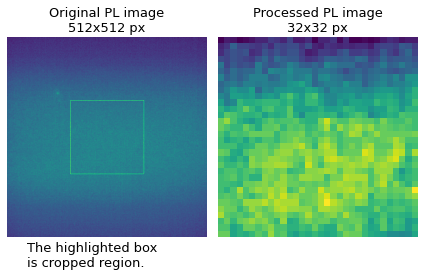

In [33]:
# Showing the original image
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6,4))
img_orig[new_corner_inds[0,0], new_corner_inds[0, 0]:new_corner_inds[1, 1]]=img_orig.max()*1.1
img_orig[new_corner_inds[2,0], new_corner_inds[0, 0]:new_corner_inds[1, 1]] = img_orig.max()
img_orig[new_corner_inds[0,0]:new_corner_inds[2,0], new_corner_inds[0, 1]]=img_orig.max()
img_orig[new_corner_inds[0,0]:new_corner_inds[2,0], new_corner_inds[1, 1]]=img_orig.max()

ax[0].imshow(img_orig)
ax[0].set_title('Original PL image\n{}x{} px'.format(*img_orig.shape), fontsize=13)
ax[0].text(s='The highlighted box\nis cropped region.', x=50, y=585, fontsize=13)
ax[0].axis('off')

# Showing the resized image.  
ax[1].imshow(img_feed)
ax[1].set_title('Processed PL image\n{}x{} px'.format(*img_feed.shape), fontsize=13)
ax[1].axis('off')

fig.tight_layout()

In [9]:
new_corner_inds

array([[162, 162],
       [162, 350],
       [350, 162],
       [350, 350]])